<a href="https://colab.research.google.com/github/MichaelC6/n-point-correlation-function/blob/master/Exploring_correlation_functions_Summer_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Good article](https://www.quantamagazine.org/physicists-hunt-for-the-big-bangs-triangles-20160419/) to read to prep for some of this work.

[Another read](https://www.cfa.harvard.edu/~deisenst/acousticpeak/acoustic.pdf)

[And here](https://physicstoday.scitation.org/doi/full/10.1063/PT.3.3789)

[And here](https://physicstoday.scitation.org/doi/full/10.1063/1.2911177)

# Baby steps

The following code generates 1000 (x,y) coordinate points, between 0 and 1. 

Your challenge is to

* Make a scatter plot of these points
* Calculate the distances from every ($x_i,y_i$) point to every other ($x_j,y_j$) point where the distance between any two points is given by

$$d = \sqrt{(x_i-x_j)^2 + (y_i-y_j)^2}$$

and histogram those distances. *Hint! Be careful not to calculate the distance between a point and itself!*
  * Use basic loops to do this, just to make sure you fully understand the process
  * If you want, you can compare your output to scipy's [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) or [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) You'll have to figure out which one is the appropriate function :). It takes a bit to figure out how to munge the data to use these functions, but I can help with that if you get stuck. 

**Good luck!**

In [ ]:

import numpy as np
import matplotlib.pylab as plt

from time import time

import scipy.spatial as ss

npoints = 1000

x = np.random.random(npoints)
y = np.random.random(npoints)

# For example, look at the first 5 points....

print(x[0:5])
print(y[0:5])

[0.26026577 0.02574036 0.28977031 0.47927145 0.79497803]
[0.52300384 0.9214387  0.77025225 0.4201606  0.41691718]


Text(0.5, 1.0, 'Scatter Plot of Random Xs and Ys')

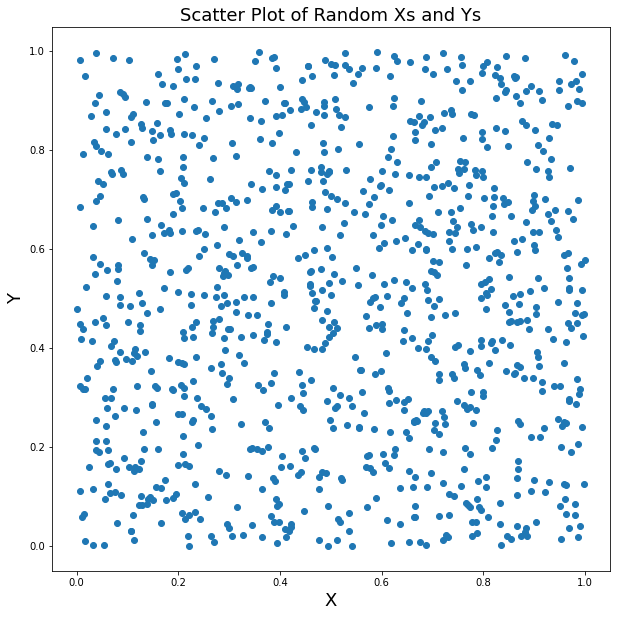

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel("X", fontsize=18)
plt.ylabel("Y",fontsize=18)
plt.title("Scatter Plot of Random Xs and Ys",fontsize=18)

In [ ]:
# Your code follows
distances = []
i = 0
while i < len(x):
  j = 0
  while j < len(y):
    if i != j:
      xDist = (x[i]-x[j])**2
      yDist = (y[i]-y[j])**2
      distance = np.sqrt(xDist+yDist)
      distances.append(distance)
    j += 1
  i += 1

Text(0.5, 1.0, 'The Random  Distribution of 1000 Points Distances to Every other Point.')

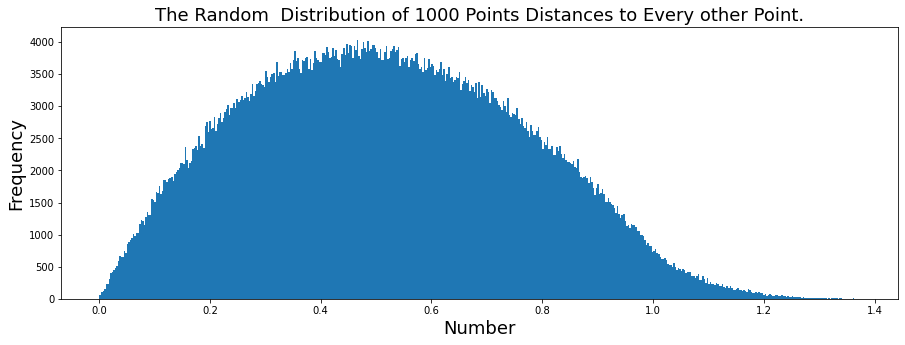

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(distances, bins=500)
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("The Random  Distribution of 1000 Points Distances to Every other Point.",fontsize=18)

[1.41421356 2.82842712 1.41421356]


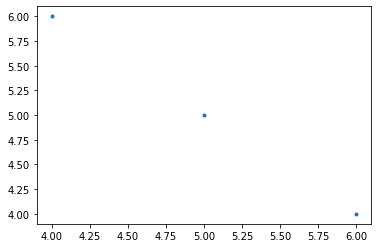

In [ ]:
test = np.array([[4,5,6],[6,5,4]])

# Bellis edits
plt.figure()
plt.plot(test[0],test[1],'.')

d = ss.distance.pdist(test.transpose())
print(d)

Text(0.5, 1.0, 'The Random  Distribution of 1000 Points Distances to Every other Point.')

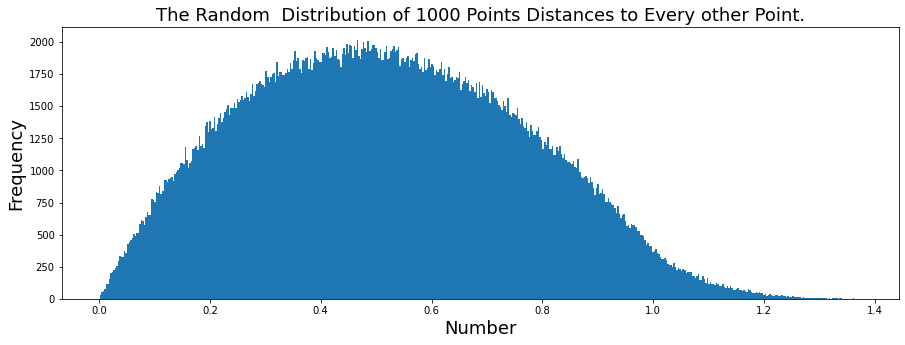

In [ ]:
i = 0
arr = []
while i < len(x):
  arr += [[x[i],y[i]]]
  i += 1
distances_check = ss.distance.pdist(arr)

plt.figure(figsize=(15,5))
plt.hist(distances_check, bins=500)
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("The Random  Distribution of 1000 Points Distances to Every other Point.",fontsize=18)

# Next challenge!

* Take what you did in calculating the distances and turn it into a function (call it calc_distances) that takes in 2 pairs of x,y coordinates and returns the distances in a list
* Make use of the time function (illustrated below) to time how long it takes to do 1000 points. Then change the number of points to 10000 and calculate how long it takes. 
* Think about if there is a way to use the numpy functions (hint below) and *one* loop to speed up your calculations. If there is, write a few function (call it calc_distances_numpy) and compare the speed to your current function.

Good luck!

In [ ]:
# Demo of time function

# Get the CPU clock time in seconds
start = time()
x = np.random.random(10000000)
stop = time()

print("Time to run: {0:.3f} seconds".format(stop-start))

Time to run: 0.116 seconds


In [ ]:
# Numpy can really speed things up!
# Here's a demo

npoints = 1000000 # 1 million
data = np.random.random(npoints)

# Calculate the square of these numbers two different ways

# Way 1 - pure python loops
new_data = np.zeros(npoints)

start = time()
for i in range(npoints):
  new_data[i] = data[i]**2
stop = time()

print("Time to run: {0:.3f} seconds".format(stop-start))

# Way 2 - numpy

new_data2 = np.zeros(npoints)
start = time()
new_data2 = data**2
stop = time()

print("Time to run: {0:.3f} seconds".format(stop-start))


Time to run: 0.590 seconds
Time to run: 0.006 seconds


In [ ]:
def calc_distances(x,y):
  distances = []
  i = 0
  while i < len(x):
    j = 0
    while j < len(y):
      if i != j:
        xDist = (x[i]-x[j])**2
        yDist = (y[i]-y[j])**2
        distance = np.sqrt(xDist+yDist)
        distances.append(distance)
      j += 1
    i += 1
  return distances

In [ ]:
npoints = 5000
x = np.random.random(npoints)
y = np.random.random(npoints)

start = time()
test = calc_distances(x,y)
stop = time()
print("Time to run: {0:.3f} seconds".format(stop-start))

Time to run: 81.099 seconds


In [ ]:
def calc_distances_numpy(x,y):
  distances = []
  i = 0
  while i < len(x):
    Xi = np.full((len(x)-1), x[i])
    Yi = np.full((len(y)-1), y[i])
    Xj = x 	
    Xj = np.delete(Xj, i)
    Yj = y
    Yj = np.delete(Yj, i)
    distances += (np.sqrt((Xi-Xj)**2+(Yi-Yj)**2)).tolist()
    i += 1
  return distances

In [ ]:
start = time()
test2 = calc_distances_numpy(x,y)
stop = time()
print("Time to run: {0:.3f} seconds".format(stop-start))
print(test2[0:10])
print(len(test2))

Time to run: 1.657 seconds
[0.6973613630427911, 0.3329354648404457, 0.5407978064202261, 0.09508886305823985, 0.17977590320153655, 0.7557863066362448, 0.6486176392031748, 0.31215223017925164, 0.06495241641694693, 0.564346243241777]
24995000


In [ ]:
# Bellis edits
def calc_distances_numpy_Bellis(x,y):
  npts = len(x)
  distances = []
  
  for i in range(npts):
    dx = x[i] - x[i+1:]
    dy = y[i] - y[i+1:]
    distance = np.sqrt(dx*dx + dy*dy)
    distances += distance.tolist()
  
  return distances

In [ ]:
start = time()
test3 = calc_distances_numpy_Bellis(x,y)
stop = time()
print("Time to run: {0:.3f} seconds".format(stop-start))
print(test3[0:10])
print(len(test3))

Time to run: 0.659 seconds
[0.6973613630427911, 0.3329354648404457, 0.5407978064202261, 0.09508886305823985, 0.17977590320153655, 0.7557863066362448, 0.6486176392031748, 0.31215223017925164, 0.06495241641694693, 0.564346243241777]
12497500


# Calculate the 2pt correlation function for some test data

First we are going download the datasets. One is labeled *data* and one is *random*. We'll download three versions of these files: one with 1000 galaxies, one with 10000 galaxies, and one with 100000 galaxies. You can use the small ones for testing your code and when you feel ready, you can run it on the larger datasets. 

We'll make use of the wget command to download the files to Colab's servers. 

In [ ]:
# 1k galaxies
!wget https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_data_1000gals.dat
!wget https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_random_1000gals.dat

# 10k galaxies
!wget https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_random.dat
!wget https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_data.dat

# 100k galaxies
!wget https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_random_LARGE_SAMPLE.dat
!wget https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_data_LARGE_SAMPLE.dat

!ls -ltr

--2020-10-12 19:33:34--  https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_data_1000gals.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33000 (32K) [text/plain]
Saving to: ‘GRID_model_data_1000gals.dat’

GRID_model_data_100 100%[===================>]  32.23K  --.-KB/s    in 0.006s  

2020-10-12 19:33:35 (5.64 MB/s) - ‘GRID_model_data_1000gals.dat’ saved [33000/33000]

--2020-10-12 19:33:35--  https://raw.githubusercontent.com/mattbellis/pyncorr/master/test_data/GRID_model_random_1000gals.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, a

## Reading in the files

The files are 3 columns that (for now) you can think of as $x,y,z$ coordinates. 

Read in the 1000 and 10000 galaxy files (both data and random) and plot them. 

In [ ]:
# Your code here
Gals1000Data = np.loadtxt('GRID_model_data_1000gals.dat', dtype=float)
Gals1000Random = np.loadtxt('GRID_model_random_1000gals.dat', dtype=float)

Gals10000Data = np.loadtxt('GRID_model_data.dat', dtype=float)
Gals10000Random = np.loadtxt('GRID_model_random.dat', dtype=float)

Gals100000Data = np.loadtxt('GRID_model_data_LARGE_SAMPLE.dat', dtype=float)
Gals100000Random = np.loadtxt('GRID_model_random_LARGE_SAMPLE.dat', dtype=float)

### Graphs

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
#Gals1000Data
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(Gals1000Data, x=0, y=1, z=2)
fig.update_traces(marker=dict(size=3))

fig.update_layout(
    title={
        'text': "1000 Galaxy Data",
          })
fig.show()

In [ ]:
df = px.data.iris()
fig = px.scatter_3d(Gals1000Random, x=0, y=1, z=2)
fig.update_traces(marker=dict(size=3))

fig.update_layout(
    title={
        'text': "1000 Galaxy Random Data",
          })
fig.show()

In [ ]:
df = px.data.iris()
fig = px.scatter_3d(Gals10000Data, x=0, y=1, z=2)
fig.update_traces(marker=dict(size=1))

fig.update_layout(
    title={
        'text': "10000 Galaxy Data",
          })
fig.show()

In [ ]:
df = px.data.iris()
fig = px.scatter_3d(Gals10000Random, x=0, y=1, z=2)
fig.update_traces(marker=dict(size=1))

fig.update_layout(
    title={
        'text': "10000 Galaxy Random Data",
          })
fig.show()

## 3D distances

Make a version of your distances code to work with 3D coordinates.

Modify the code to take in a boolean called ```same```. and two sets of coordinates. 

* If ```same``` is ```True```, then the code should assume that both sets of coordinates are from the same file and it should take care not to double count or self count distances. 
* If ```same``` is ```False```, then the code should assume that both sets of coordinates are from different files and it can calculate all the possible distances. 

The first case is for when you are calculating the $DD$ and $RR$ parts of the 2PCF (2-point correlation function) and the second case is for the $DR$. When your function is working, give it a shot and try to calculate all 3 terms! Make a histogram of each to see what they look like!

### Previous Attempts

In [ ]:
# Your code here
def calc3D(coordI,coordJ,same = False):
  distances = []
  i = 0
  while i < len(coordI):
    if (same == True):
      Xi = np.full((coordI-1), coordI[0][i])
      Yi = np.full((coordI-1), coordI[1][i])
      Zi = np.full((coordI-1), coordI[2][i])
      Xj = coordJ[0]	
      del xJ[i]
      Yj = coordJ[1]
      del yJ[i]
      Zi = coordJ[2]	
      del ZJ[i]
      np.append(distances,(np.sqrt((Xi-Xj)**2+(Yi-Yj)**2)+(Zi-Zj)**2))
    else:
      Xi = np.full((coordI), coordI[0][i])
      Yi = np.full((coordI), coordI[1][i])
      Zi = np.full((coordI), coordI[2][i])
      Xj = coordJ[0][i]	
      Yj = coordJ[1][i]	
      Zi = coordJ[2][i]	
      np.append(distances,(np.sqrt((Xi-Xj)**2+(Yi-Yj)**2)+(Zi-Zj)**2))     
    i += 1
  return distances

In [ ]:
def calc3D(coordI,coordJ,same = False):
  distances = []
  Xi2 = []
  Yi2 = []
  Zi2 = []
  i = 0
  while i < len(coordI):
    Xi2 += coordJ[i][0]
    Yi2 += coordJ[i][1]
    Zi2 += coordJ[i][2]
    i += 1
  Xj2 = []
  Yj2 = []
  Zj2 = []
  j = 0
  while j < len(coordJ):
    Xj2 += coordJ[j][0]
    Yj2 += coordJ[j][1]
    Zj2 += coordJ[j][2]
    j += 1
  i = 0
  if (same == True):
    while i < len(coordI):
      Xi = np.full((len(Xi2)-1), Xi2[i])
      np.full((len(x)-1), x[i])
      print(len(Xi))
      Yi = np.full((len(Yi2)-1), Yi2[i])
      print(len(Yi))
      Zi = np.full((len(Zi2)-1), Zi2[i])
      print(len(Zi))
      Xj = np.delete(Xj2, i)
      print(len(Xj))
      Yj = np.delete(Yj2, i)
      print(len(Yj))
      Zj = np.delete(Zj2, i)
      print(len(Zj))
      distances += (np.sqrt((Xi-Xj)**2+(Yi-Yj)**2 + (Zi-Zj)**2)).tolist()
      i += 1
  else:
    while i < len(coordI):
      Xi = np.full((len(Xi2)-1), Xi2[i])
      print(len(Xi))
      Yi = np.full((len(Yi2)-1), Yi2[i])
      print(len(Yi))
      Zi = np.full((len(Zi2)-1), Zi2[i])
      print(len(Zi))
      print(len(Zi))
      print(len(Xj))
      print(len(Yj))
      print(len(Zj))
      distances += (np.sqrt((Xi-Xj)**2+(Yi-Yj)**2 + (Zi-Zj)**2)).tolist()
      i += 1
  return distances

### Hopefully the right attempt lol

In [ ]:
def calc3D(I,J,same=False):
  I_Xs = []
  I_Ys = []
  I_Zs = []

  count = 0
  while count < len(I):
    I_Xs.append(I[count][0])
    I_Ys.append(I[count][1])
    I_Zs.append(I[count][2])
    count += 1

  J_Xs = []
  J_Ys = []
  J_Zs = []

  count = 0
  while count < len(J):
    J_Xs.append(J[count][0])
    J_Ys.append(J[count][1])
    J_Zs.append(J[count][2])
    count += 1


  distances = []

  i = 0

  if same == True:
    while i < len(I_Xs):
      Xi = np.full((len(I_Xs)-1), I_Xs[i])
      Yi = np.full((len(I_Ys)-1), I_Ys[i])
      Zi = np.full((len(I_Zs)-1), I_Zs[i])
      Xj = J_Xs 	
      Xj = np.delete(Xj, i)
      Yj = J_Ys
      Yj = np.delete(Yj, i)
      Zj = J_Zs
      Zj = np.delete(Zj, i)
      distances += (np.sqrt((Xi-Xj)**2+(Yi-Yj)**2 + (Zi-Zj)**2)).tolist()
      i += 1
  else:
    while i < len(I_Xs):
      Xi = np.full((len(I_Xs)), I_Xs[i])
      Yi = np.full((len(I_Ys)), I_Ys[i])
      Zi = np.full((len(I_Zs)), I_Zs[i])
      Xj = J_Xs 	
      Yj = J_Ys
      Zj = J_Zs
      distances += (np.sqrt((Xi-Xj)**2+(Yi-Yj)**2 + (Zi-Zj)**2)).tolist()
      i += 1  
  return np.array(distances)

# Now caculate the 2pt correlation function

First we have to *normalize* the individual calculations. In other words, we need to take into account the number of galaxies used in the data and the randoms so that if there are different numbers in future calculations, it's OK!

Let 

```nd = <number of galaxies in data sample>```

```nr = <number of galaxies in random sample>```


To normalize, you'll calculate the following

* ```dd_norm_factor = (nd*nd - nd)/2```
* ```rr_norm_factor = (nr*nr - nr)/2```
* ```dr_norm_factor = (nd*nr)```

Then use them....

* ```DDnorm = DD/dd_norm_factor```
* ```RRnorm = RR/rr_norm_factor```
* ```DRnorm = DR/dr_norm_factor```

Then calculate the 2pcf!

* ```pcf = (DDnorm - 2*DRnorm + RRnorm)/RRnorm```

If you then plot the ```pcf```, it should interesting.   :)



In [ ]:
nd = len(Gals1000Data)
nr = len(Gals1000Random)
dd_norm_factor = (nd*nd - nd)/2
rr_norm_factor = (nr*nr - nr)/2
dr_norm_factor = (nd*nr)
#DDnorm = np.histogram(calc3D(Gals1000Data,Gals1000Random,True),bins=100, normed = dd_norm_factor)
#RRnorm = np.histogram(calc3D(Gals1000Data,Gals1000Random,True), bins=100, normed = rr_norm_factor)
#DRnorm = np.histogram(calc3D(Gals1000Data,Gals1000Random,False), bins=100, normed = dr_norm_factor)
DDnorm = np.divide(np.histogram(calc3D(Gals1000Data,Gals1000Random,True),bins=25),dd_norm_factor)
RRnorm = np.divide(np.histogram(calc3D(Gals1000Data,Gals1000Random,True), bins=25), rr_norm_factor)
DRnorm = np.divide(np.histogram(calc3D(Gals1000Data,Gals1000Random,False), bins=25), dr_norm_factor)

[array([4.05805806e-03, 2.33453453e-02, 5.44484484e-02, 8.95035035e-02,
       1.25015015e-01, 1.54492492e-01, 1.76252252e-01, 1.86874875e-01,
       1.82660661e-01, 1.65313313e-01, 1.43149149e-01, 1.21747748e-01,
       1.04672673e-01, 9.09409409e-02, 8.03803804e-02, 7.08908909e-02,
       6.00240240e-02, 4.96576577e-02, 3.98098098e-02, 3.04644645e-02,
       2.31351351e-02, 1.47527528e-02, 6.80480480e-03, 1.51751752e-03,
       8.80880881e-05])
 array([2.61149154e-06, 6.40355874e-05, 1.25459683e-04, 1.86883779e-04,
       2.48307875e-04, 3.09731971e-04, 3.71156067e-04, 4.32580162e-04,
       4.94004258e-04, 5.55428354e-04, 6.16852450e-04, 6.78276546e-04,
       7.39700642e-04, 8.01124738e-04, 8.62548833e-04, 9.23972929e-04,
       9.85397025e-04, 1.04682112e-03, 1.10824522e-03, 1.16966931e-03,
       1.23109341e-03, 1.29251750e-03, 1.35394160e-03, 1.41536570e-03,
       1.47678979e-03, 1.53821389e-03])]


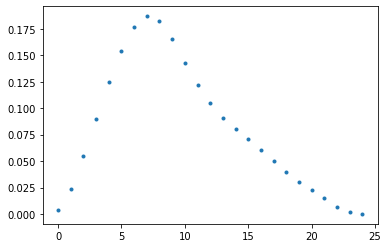

In [ ]:
############ BELLIS EDITS #############
# Let's look at what is returned by the histogram function
print(DDnorm)

# There are two entries, the heights of the bins, scaled by the normalization
# factor, and the bin *edges*. So if you have n bins, there are n+1 edges
#
# You can plot the heights with a simple plot, though the x-values
# just because some default 0, 1, 2, etc...
plt.figure()
plt.plot(DDnorm[0],'.');

# And since these are numpy arrays, you can easily calculate the 
# 2pcf since it is these *heights* of the histogram that you
# are adding/subtracting! 
#
# Uncomment the below and see if you can get it! :D 
pcf = (DDnorm[0] - 2*DRnorm[0] + RRnorm[0])/RRnorm[0]

Text(0.5, 1.0, 'pcf')

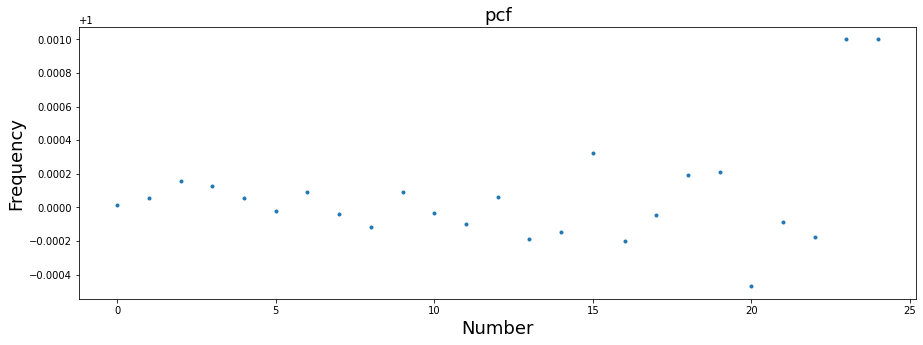

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pcf,'.')
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("pcf",fontsize=18)

In [ ]:
def calc3D100K(I,J,nbins,same=False):
  I_Xs = []
  I_Ys = []
  I_Zs = []

  count = 0
  while count < len(I):
    I_Xs.append(I[count][0])
    I_Ys.append(I[count][1])
    I_Zs.append(I[count][2])
    count += 1

  J_Xs = []
  J_Ys = []
  J_Zs = []

  count = 0
  while count < len(J):
    J_Xs.append(J[count][0])
    J_Ys.append(J[count][1])
    J_Zs.append(J[count][2])
    count += 1


  distances = []
  hist_tot = np.zeros(nbins,dtype=float)
  bin_edges = np.zeros(nbins+1,dtype=float)
  i = 0

  if same == True:
    while i < len(I_Xs):
      Xi = np.full((len(I_Xs)-1), I_Xs[i])
      Yi = np.full((len(I_Ys)-1), I_Ys[i])
      Zi = np.full((len(I_Zs)-1), I_Zs[i])
      Xj = J_Xs 	
      Xj = np.delete(Xj, i)
      Yj = J_Ys
      Yj = np.delete(Yj, i)
      Zj = J_Zs
      Zj = np.delete(Zj, i)
      distances = (np.sqrt((Xi-Xj)**2+(Yi-Yj)**2 + (Zi-Zj)**2))
      hist = np.histogram(distances, bins=nbins)
      hist_tot += hist[0]
      bin_edges += hist[1]
      i += 1
  else:
    while i < len(I_Xs):
      Xi = np.full((len(I_Xs)), I_Xs[i])
      Yi = np.full((len(I_Ys)), I_Ys[i])
      Zi = np.full((len(I_Zs)), I_Zs[i])
      Xj = J_Xs 	
      Yj = J_Ys
      Zj = J_Zs
      distances = (np.sqrt((Xi-Xj)**2+(Yi-Yj)**2 + (Zi-Zj)**2))
      hist = np.histogram(distances, bins=nbins)
      hist_tot += hist[0]
      bin_edges += hist[1]
      i += 1  
  return hist_tot,bin_edges

#### 10000 Data

Time to run: 9556.697 seconds


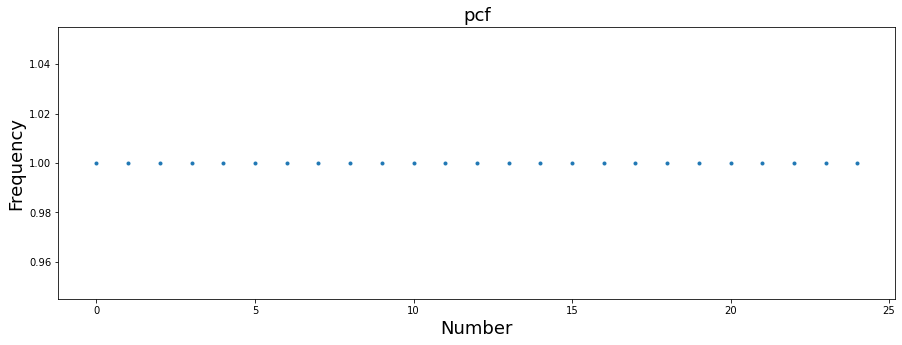

In [ ]:
start = time()

nd = len(Gals100000Data)
nr = len(Gals100000Random)

dd_norm_factor = (nd*nd - nd)/2
rr_norm_factor = (nr*nr - nr)/2
dr_norm_factor = (nd*nr)

DDnorm = np.divide(calc3D100K(Gals100000Data,Gals100000Random,25,True),dd_norm_factor)
RRnorm = np.divide(calc3D100K(Gals100000Data,Gals100000Random,25,True), rr_norm_factor)
DRnorm = np.divide(calc3D100K(Gals100000Data,Gals100000Random,25,True), dr_norm_factor)

pcf = (DDnorm - 2*DRnorm + RRnorm)/RRnorm

plt.figure(figsize=(15,5))
plt.plot(pcf[0],'.')
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("pcf",fontsize=18)

stop = time()
print("Time to run: {0:.3f} seconds".format(stop-start))

In [ ]:
pcf

array([array([1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001,
       1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001,
       1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001,
       1.0001]),
       array([1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001,
       1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001,
       1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001, 1.0001,
       1.0001, 1.0001])], dtype=object)

#### 10000 Data

In [ ]:
start = time()

nd = len(Gals100000Data)
nr = len(Gals100000Random)

dd_norm_factor = (nd*nd - nd)/2
rr_norm_factor = (nr*nr - nr)/2
dr_norm_factor = (nd*nr)

DDnorm = np.divide(np.histogram(calc3D(Gals100000Data,Gals100000Random,True),bins=25),dd_norm_factor)
RRnorm = np.divide(np.histogram(calc3D(Gals100000Data,Gals100000Random,True), bins=25), rr_norm_factor)
DRnorm = np.divide(np.histogram(calc3D(Gals100000Data,Gals100000Random,False), bins=25), dr_norm_factor)

pcf = (DDnorm[0] - 2*DRnorm[0] + RRnorm[0])/RRnorm[0]

plt.figure(figsize=(15,5))
plt.plot(pcf,'.')
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("pcf",fontsize=18)

stop = time()
print("Time to run: {0:.3f} seconds".format(stop-start))

#### Extra Code (ignore)

Text(0.5, 1.0, 'DRnorm')

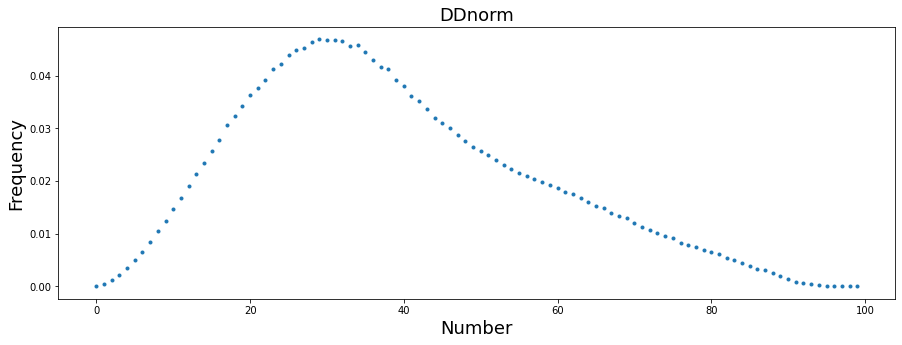

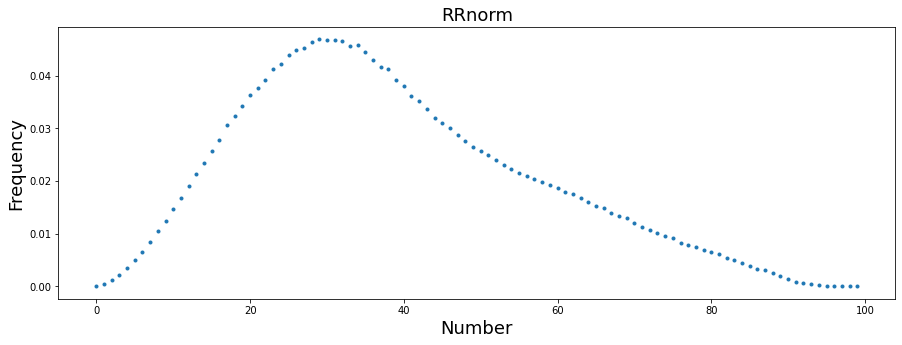

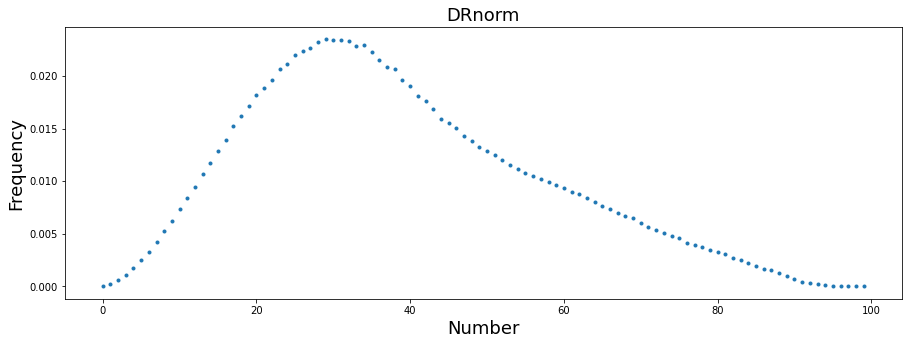

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(DDnorm[0],'.');
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("DDnorm",fontsize=18)

plt.figure(figsize=(15,5))
plt.plot(RRnorm[0],'.');
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("RRnorm",fontsize=18)

plt.figure(figsize=(15,5))
plt.plot(DRnorm[0],'.');
plt.xlabel("Number", fontsize=18)
plt.ylabel("Frequency",fontsize=18)
plt.title("DRnorm",fontsize=18)